In [1]:
print("Hello World!")

Hello World!


# D206 Performance Assessment

## Part 1:  Research Question

## A. Researh Question- What are the probable root causes of customer churn?

## B. Description of Dataset and Variables

### The data set contains 10,000 rows of customer records from a telecommunications company.
The data was collected to gather whether or not each customer has kept or left the company's service within the last month. The "Churn" column provides whether or not the customer was retained.
Data that could identify a causal relationship with a yes or no "Churn" outcome include: 
	Services that each customer signed up for(e.g., phone, internet service, streaming services, multiple lines) 
	Customer account information (tenure with the company, payment method, yearly bandwidth usage, devices)
        Customer demographics (gender, marital status, income, etc.)
Additionally, the company conducted a survey and collected data regarding the customers' importance weighting certain aspects of customer service.
The data is both numerical such as yearly GB bandwidth usage; customer annual income; number of children in the household;
and categorical "Yes" or "No" for Churn; and customer job, education, and employment data.

# Import Packages

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
pip install "missingno == 0.5.2"

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip list

Package                       Version
----------------------------- ---------------
aiofiles                      22.1.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
asttokens                     2.0.5
atomicwrites                  1.4.0
attrs                         22.1.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
bcrypt                        3.2.0
beautifulsoup4                4.12.2
binaryornot                   0.4.4
black                         0.0
bleach                        4.1.0
Bottleneck                    1.3.5
brotlipy                      0.7.0
certifi                       2023.5.7
cffi                          1.15.1
chardet                       4.0.0
chars

In [6]:
import missingno as msno

In [7]:
import statsmodels as statsm

In [8]:
from tabulate import tabulate

In [9]:
import seaborn as sns

In [10]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set column disply then load data

In [12]:
pd.set_option('display.max_columns', None)

In [13]:
churn_df=pd.read_csv('D:\WGU\D206 Data Cleaning\churn_raw_data.csv')
churn_df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


In [14]:
churn_df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


## Examen the dataframe Column Names

In [15]:
churn_columns = churn_df.columns
print(churn_columns)

Index(['Unnamed: 0', 'CaseOrder', 'Customer_id', 'Interaction', 'City',
       'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
       'Timezone', 'Job', 'Children', 'Age', 'Education', 'Employment',
       'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email',
       'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem',
       'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'item1', 'item2', 'item3',
       'item4', 'item5', 'item6', 'item7', 'item8'],
      dtype='object')


In [16]:
# verify number of records
churn_df.shape

(10000, 52)

### Remove duplicate *Unnamed* Column

In [17]:
# remove duplicate Unnnamed column

churn_df=churn_df.drop(churn_df.columns[0],axis=1)
churn_df.head()

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


## Rename Survey Response Importance Rating Column Names

In [18]:
churn_df.rename(columns = {'item1': 'timely_response', 'item2': 'timely_fixes' , 'item3':'timely_replacements' ,
                           'item4': 'reliability' , 'item5': 'options' , 'item6': 'respectful_response' ,
                           'item7': 'courteous_exchange' , 'item8': 'evidence_of_active_listening'}, inplace=True)
churn_df.head()

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,timely_response,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,evidence_of_active_listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


In [19]:
churn_df.shape

(10000, 51)

## Check for Nulls

In [20]:
# how many nulls in each column?
churn_df.isnull().sum()

CaseOrder                          0
Customer_id                        0
Interaction                        0
City                               0
State                              0
County                             0
Zip                                0
Lat                                0
Lng                                0
Population                         0
Area                               0
Timezone                           0
Job                                0
Children                        2495
Age                             2475
Education                          0
Employment                         0
Income                          2490
Marital                            0
Gender                             0
Churn                              0
Outage_sec_perweek                 0
Email                              0
Contacts                           0
Yearly_equip_failure               0
Techie                          2477
Contract                           0
P

## Check for Duplicates

In [21]:
churn_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [22]:
print(churn_df.duplicated().value_counts())

False    10000
dtype: int64


## Check for duplicate rows

In [23]:
duplicate_rows = churn_df.loc[churn_df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [CaseOrder, Customer_id, Interaction, City, State, County, Zip, Lat, Lng, Population, Area, Timezone, Job, Children, Age, Education, Employment, Income, Marital, Gender, Churn, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Techie, Contract, Port_modem, Tablet, InternetService, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Tenure, MonthlyCharge, Bandwidth_GB_Year, timely_response, timely_fixes, timely_replacements, reliability, options, respectful_response, courteous_exchange, evidence_of_active_listening]
Index: []


## Fix Leading Zeros on Zip Code column

In [24]:
def fix_zip(series):
      return series.astype(str).str.extract('(\d+)', expand=False).str.zfill(5)
churn_df['fixed_zip'] = fix_zip(churn_df['Zip'])
print (churn_df['fixed_zip'])

0       99927
1       48661
2       97148
3       92014
4       77461
        ...  
9995    05758
9996    37042
9997    79061
9998    30117
9999    30523
Name: fixed_zip, Length: 10000, dtype: object


In [25]:
churn_df.dtypes

CaseOrder                         int64
Customer_id                      object
Interaction                      object
City                             object
State                            object
County                           object
Zip                               int64
Lat                             float64
Lng                             float64
Population                        int64
Area                             object
Timezone                         object
Job                              object
Children                        float64
Age                             float64
Education                        object
Employment                       object
Income                          float64
Marital                          object
Gender                           object
Churn                            object
Outage_sec_perweek              float64
Email                             int64
Contacts                          int64
Yearly_equip_failure              int64


In [26]:
churn_columns = churn_df.columns
print(churn_columns)
churn_df.shape

Index(['CaseOrder', 'Customer_id', 'Interaction', 'City', 'State', 'County',
       'Zip', 'Lat', 'Lng', 'Population', 'Area', 'Timezone', 'Job',
       'Children', 'Age', 'Education', 'Employment', 'Income', 'Marital',
       'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet',
       'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'timely_response', 'timely_fixes',
       'timely_replacements', 'reliability', 'options', 'respectful_response',
       'courteous_exchange', 'evidence_of_active_listening', 'fixed_zip'],
      dtype='object')


(10000, 52)

## Reorder Columns with Fixed Zip next to original Zip

In [27]:
new_columns = ['CaseOrder', 'Customer_id', 'Interaction', 'City', 'State', 'County',
       'Zip','fixed_zip', 'Lat', 'Lng', 'Population', 'Area', 'Timezone', 'Job',
       'Children', 'Age', 'Education', 'Employment', 'Income', 'Marital',
       'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet',
       'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'timely_response', 'timely_fixes',
       'timely_replacements', 'reliability', 'options', 'respectful_response',
       'courteous_exchange', 'evidence_of_active_listening']
churn_df=churn_df.reindex(columns=new_columns)
churn_df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'City', 'State', 'County',
       'Zip', 'fixed_zip', 'Lat', 'Lng', 'Population', 'Area', 'Timezone',
       'Job', 'Children', 'Age', 'Education', 'Employment', 'Income',
       'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet',
       'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'timely_response', 'timely_fixes',
       'timely_replacements', 'reliability', 'options', 'respectful_response',
       'courteous_exchange', 'evidence_of_active_listening'],
      dtype='object')

## B. List of Variables

### Variables with Examples

In [28]:
churn_df.head(4).T

,0,1,2,3
CaseOrder,1,2,3,4
Customer_id,K409198,S120509,K191035,D90850
Interaction,aa90260b-4141-4a24-8e36-b04ce1f4f77b,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,344d114c-3736-4be5-98f7-c72c281e2d35,abfa2b40-2d43-4994-b15a-989b8c79e311
City,Point Baker,West Branch,Yamhill,Del Mar
State,AK,MI,OR,CA
County,Prince of Wales-Hyder,Ogemaw,Yamhill,San Diego
Zip,99927,48661,97148,92014
fixed_zip,99927,48661,97148,92014
Lat,56.251,44.32893,45.35589,32.96687
Lng,-133.37571,-84.2408,-123.24657,-117.24798


## Variable, dtype, and DataType

In [29]:
# had to spit up the variable into two groups to make the table as I kept getting errors 

In [30]:
table = [['Variable Name', 'python_dtype', 'quantitative/qualitative'],         
         ['CaseOrder', 'int64', 'qualitative'], ['Customer_id', 'object', 'qualitative'],['Interaction', 'object', 'qualitative'], ['City', 'object', 'qualitative'],['State', 'object', 'qualitative'],
         ['County', 'object', 'qualitative'], ['Zip', 'int64', 'qualitative'],['fixed_zip', 'object', 'qualitative'],['Lat', 'float64', 'qualitative'],['Lng', 'float64',  'qualitative'],
         ['Population', 'int64', 'qualitative'], ['Area', 'object', 'qualitative'],['Timezone',' object', 'qualitative'],['Job', 'object',' qualitative'],['Children', 'float64', 'quantitative'],
         ['Age', 'float64', 'quantitative'], ['Education', 'object', 'qualitative'],['Employment', 'object', 'qualitative'],['Income', 'float64', 'quantitative'],['Marital', 'object', 'qualitative'],
         ['Gender', 'object', 'qualitative'], ['Churn', 'object', 'qualitative'], ['Outage_sec_perweek', 'float64', 'quantitative'],['Email', 'int64',' quantitative'],['Contacts', 'int64', 'quantitative'],
         ['Yearly_equip_failure', 'int64', 'quantitative'], ['Techie', 'object', 'qualitative'], ['Contract', 'object', 'qualitative'], ['Port_modem', 'object', 'qualitative']]         
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒══════════════════════╤════════════════╤════════════════════════════╕
│ Variable Name        │ python_dtype   │ quantitative/qualitative   │
╞══════════════════════╪════════════════╪════════════════════════════╡
│ CaseOrder            │ int64          │ qualitative                │
├──────────────────────┼────────────────┼────────────────────────────┤
│ Customer_id          │ object         │ qualitative                │
├──────────────────────┼────────────────┼────────────────────────────┤
│ Interaction          │ object         │ qualitative                │
├──────────────────────┼────────────────┼────────────────────────────┤
│ City                 │ object         │ qualitative                │
├──────────────────────┼────────────────┼────────────────────────────┤
│ State                │ object         │ qualitative                │
├──────────────────────┼────────────────┼────────────────────────────┤
│ County               │ object         │ qualitative                │
├─────

In [31]:
table = [['Variable Name', 'python_dtype', 'quantitative/qualitative'],         
         ['Tablet', 'object', 'qualitative'],['InternetService', 'object', 'qualitative'],['Phone', 'object', 'qualitative'],['Multiple', 'object', 'qualitative'],
         ['OnlineSecurity', 'object', 'qualitative'],['OnlineBackup', 'object', 'qualitative'],['DeviceProtection', 'object', 'qualitative'], ['TechSupport', 'object', 'qualitative'],
         ['StreamingTV', 'object', 'qualitative'],['StreamingMovies', 'object', 'qualitative'],['PaperlessBilling', 'object', 'qualitative'], ['PaymentMethod', 'object', 'qualitative'],
         ['Tenure', 'float64', 'quantitative'],['MonthlyCharge', 'float64', 'quantitative'],['Bandwidth_GB_Year','float64','quantitative'], ['timely_response','int64','quantitative'],
         ['timely_fixes','int64','quantitative'],['timely_replacements','int64','quantitative'],['reliability', 'int64', 'quantitative'], ['options', 'int64', 'quantitative'],
         ['respectful_response', 'int64', 'quantitative'],['courteous_exchange', 'int64', 'quantitative'],['evidence_of_active_listening', 'int64', 'quantitative']]
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒══════════════════════════════╤════════════════╤════════════════════════════╕
│ Variable Name                │ python_dtype   │ quantitative/qualitative   │
╞══════════════════════════════╪════════════════╪════════════════════════════╡
│ Tablet                       │ object         │ qualitative                │
├──────────────────────────────┼────────────────┼────────────────────────────┤
│ InternetService              │ object         │ qualitative                │
├──────────────────────────────┼────────────────┼────────────────────────────┤
│ Phone                        │ object         │ qualitative                │
├──────────────────────────────┼────────────────┼────────────────────────────┤
│ Multiple                     │ object         │ qualitative                │
├──────────────────────────────┼────────────────┼────────────────────────────┤
│ OnlineSecurity               │ object         │ qualitative                │
├──────────────────────────────┼────────────────┼───

## Education

In [32]:
churn_df.Education.unique()

array(["Master's Degree", 'Regular High School Diploma',
       'Doctorate Degree', 'No Schooling Completed', "Associate's Degree",
       "Bachelor's Degree", 'Some College, Less than 1 Year',
       'GED or Alternative Credential',
       'Some College, 1 or More Years, No Degree',
       '9th Grade to 12th Grade, No Diploma',
       'Nursery School to 8th Grade', 'Professional School Degree'],
      dtype=object)

## Determine the percentages for Education 

In [33]:
churn_df.Education.value_counts(normalize=True) * 100

Regular High School Diploma                 24.21
Bachelor's Degree                           17.03
Some College, 1 or More Years, No Degree    15.62
9th Grade to 12th Grade, No Diploma          8.70
Master's Degree                              7.64
Associate's Degree                           7.60
Some College, Less than 1 Year               6.52
Nursery School to 8th Grade                  4.49
GED or Alternative Credential                3.87
Professional School Degree                   1.98
No Schooling Completed                       1.18
Doctorate Degree                             1.16
Name: Education, dtype: float64

## Assign numeric values to levels of education

In [34]:
churn_df['education_numeric'] = churn_df['Education']
dict_edu = {"education_numeric":{"No Schooling Completed" : 0,  "Nursery School to 8th Grade" :4, "9th Grade to 12th Grade, No Diploma" : 10, "Regular High School Diploma": 12,
                                 "GED or Alternative Credential": 12, "Some College, Less than 1 Year" : 12, "Some College, 1 or More Years, No Degree" : 13, "Associate's Degree" : 14,
                                 "Bachelor's Degree" : 16, "Master's Degree" : 18, "Professional School Degree" : 18, "Doctorate Degree": 20}}
churn_df.replace(dict_edu, inplace=True)

In [35]:
new_columns = ['CaseOrder', 'Customer_id', 'Interaction', 'City', 'State', 'County',
       'Zip','fixed_zip', 'Lat', 'Lng', 'Population', 'Area', 'Timezone', 'Job',
       'Children', 'Age', 'Education','education_numeric', 'Employment', 'Income', 'Marital',
       'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem', 'Tablet',
       'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'timely_response', 'timely_fixes',
       'timely_replacements', 'reliability', 'options', 'respectful_response',
       'courteous_exchange', 'evidence_of_active_listening']
churn_df=churn_df.reindex(columns=new_columns)

### Updated DataFrame with numeric value of education next to Education column

In [36]:
churn_df.head()

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,fixed_zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,education_numeric,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,timely_response,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,evidence_of_active_listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,18,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,12,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,12,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,20,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,18,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


In [37]:
churn_df.shape

(10000, 53)

In [38]:
churn_df.isna().sum()

CaseOrder                          0
Customer_id                        0
Interaction                        0
City                               0
State                              0
County                             0
Zip                                0
fixed_zip                          0
Lat                                0
Lng                                0
Population                         0
Area                               0
Timezone                           0
Job                                0
Children                        2495
Age                             2475
Education                          0
education_numeric                  0
Employment                         0
Income                          2490
Marital                            0
Gender                             0
Churn                              0
Outage_sec_perweek                 0
Email                              0
Contacts                           0
Yearly_equip_failure               0
T

## Visualizing Missing Numbers

<Axes: >

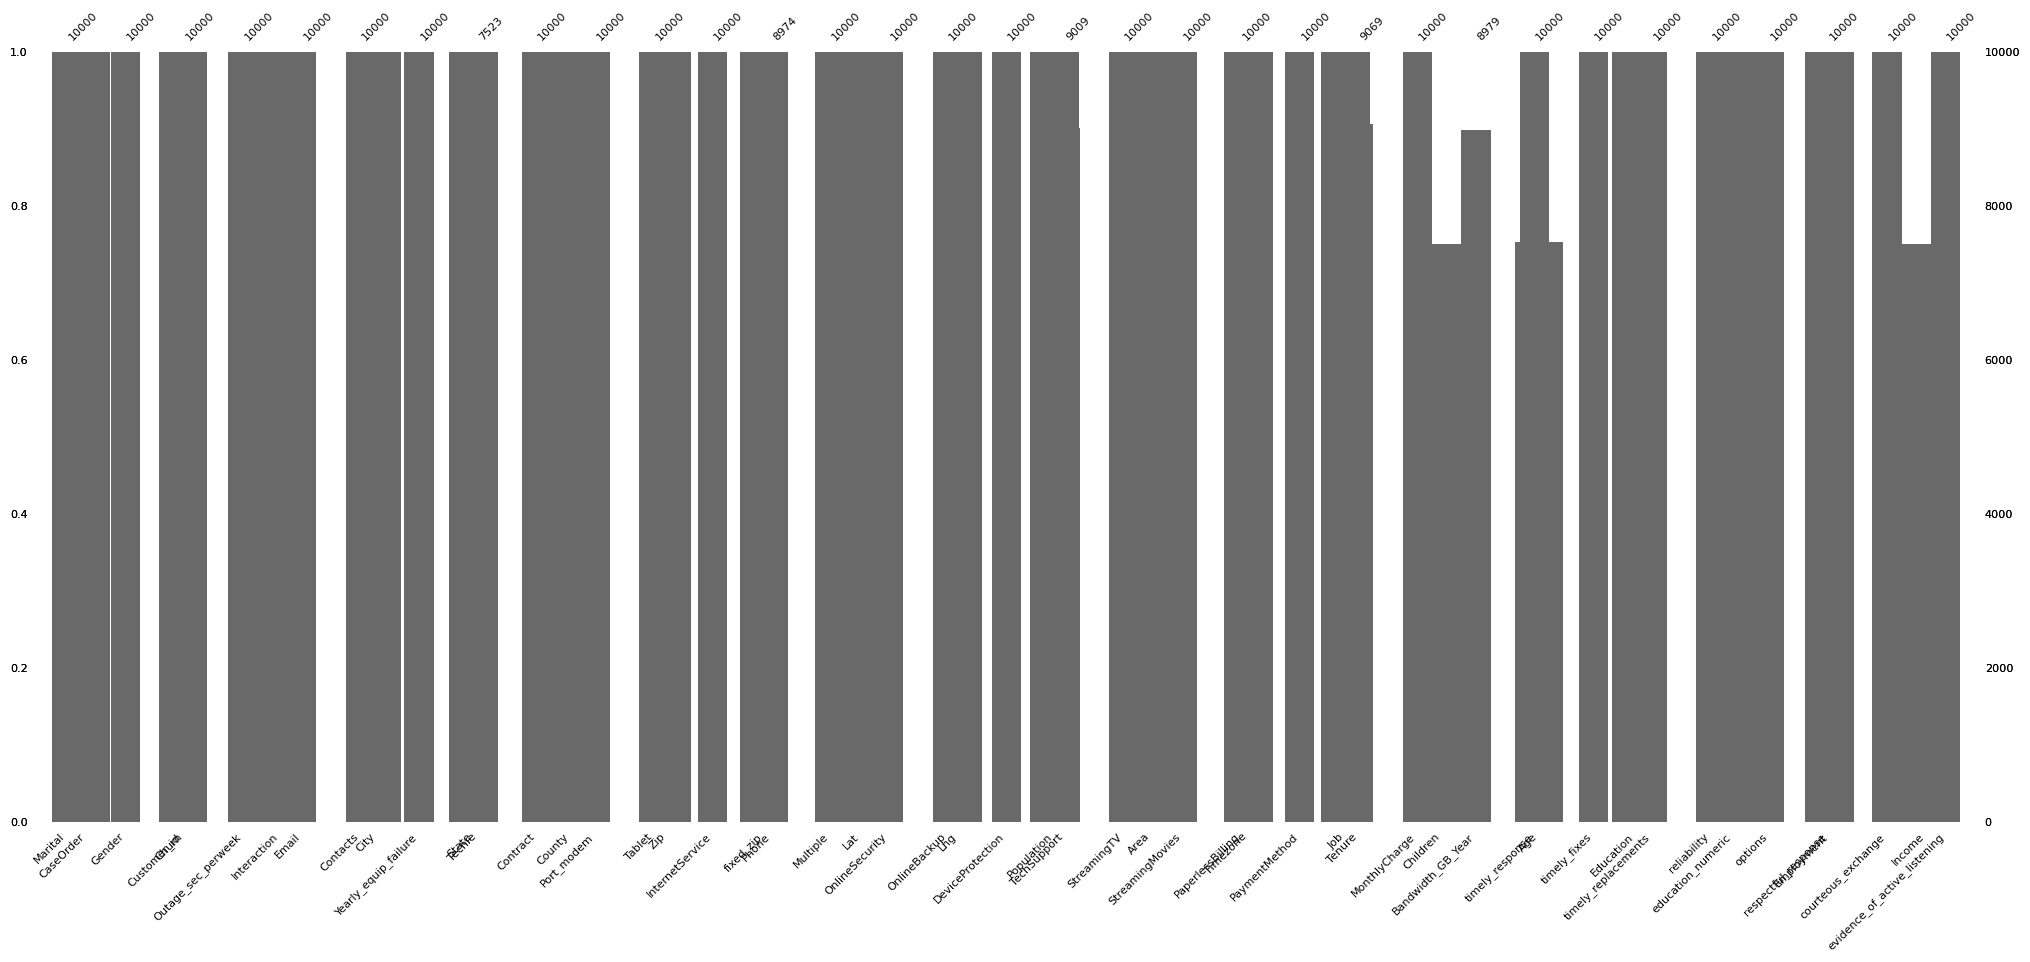

In [39]:
cols=churn_df.columns
msno.bar(churn_df[cols[:20]], fontsize=8)
msno.bar(churn_df[cols[20:]],fontsize=8)

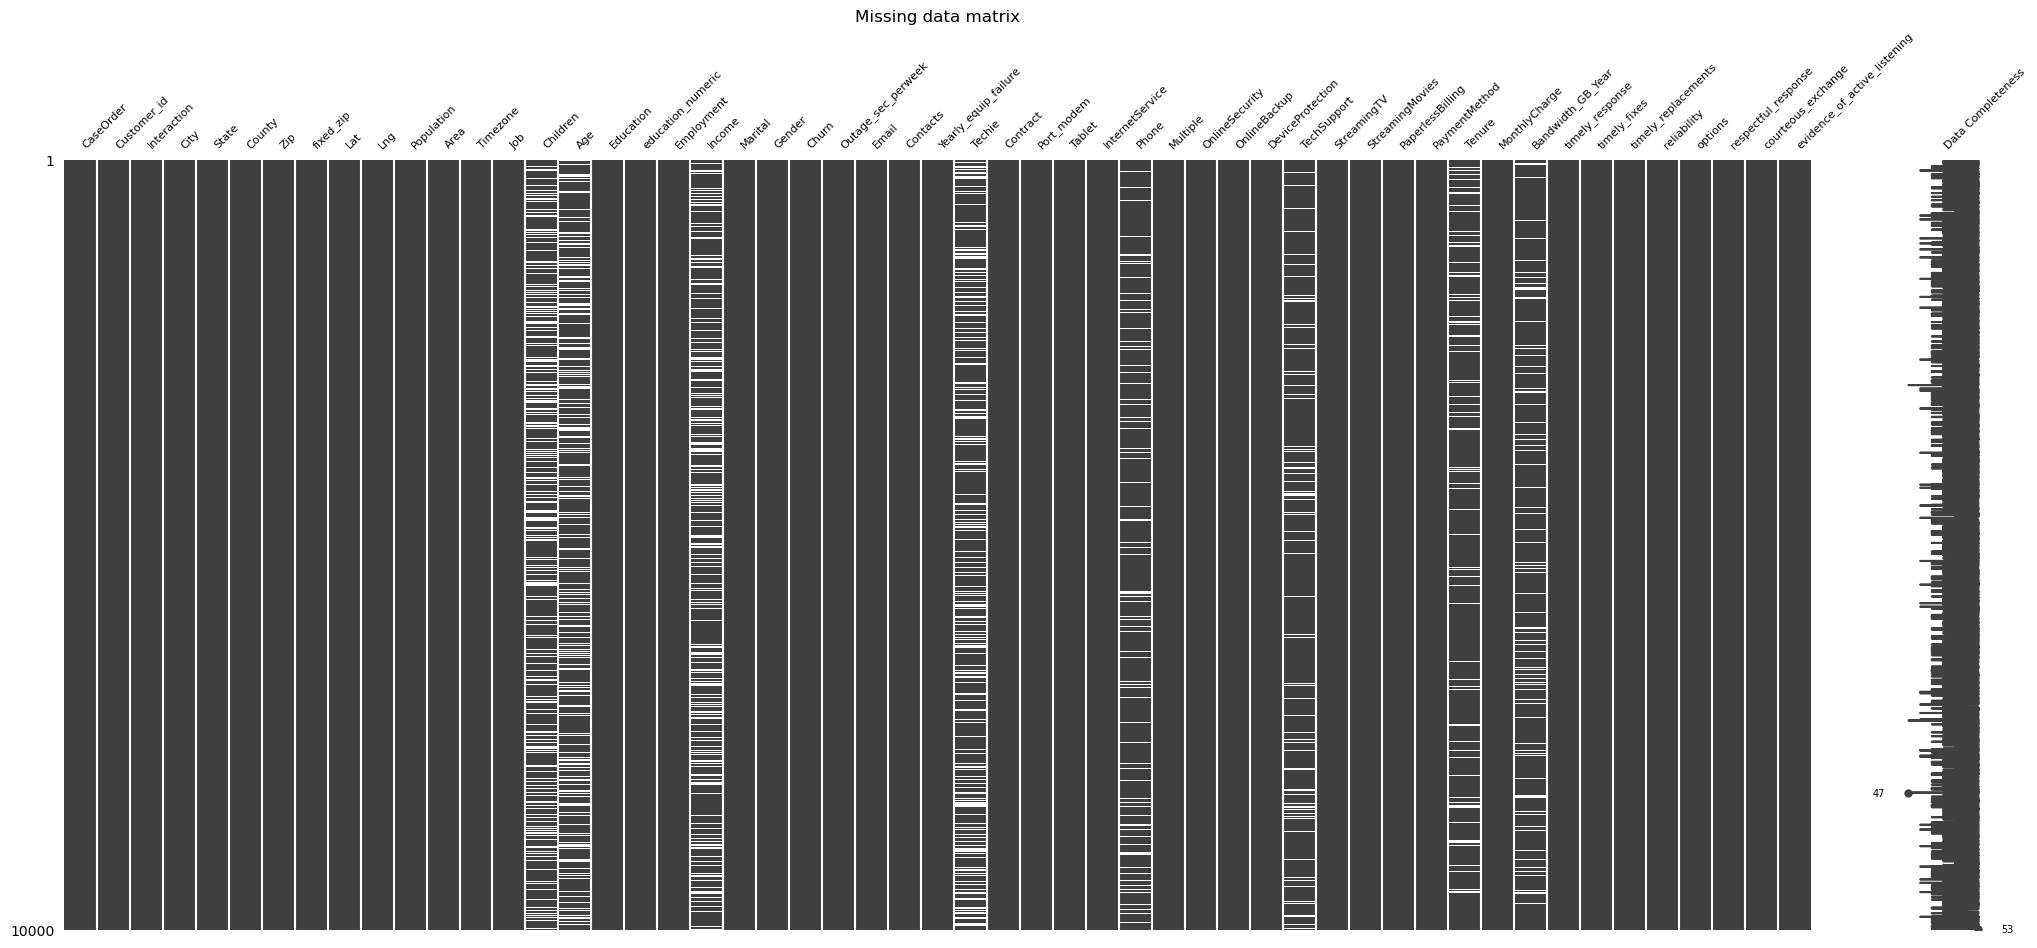

In [40]:
msno.matrix(churn_df, fontsize = 8, labels=True)
plt.title('Missing data matrix')
plt.show()

## Calcualte Curn Rate

In [41]:
churn_df.Churn.value_counts()/len(churn_df)

No     0.735
Yes    0.265
Name: Churn, dtype: float64

<Axes: >

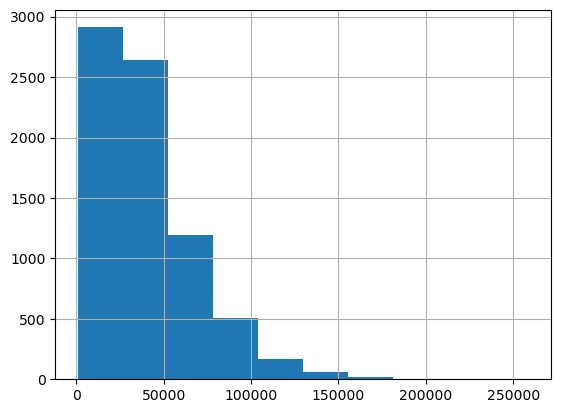

In [42]:
churn_df['Income'].hist()

## Impute Missing Values for Income 

<Axes: >

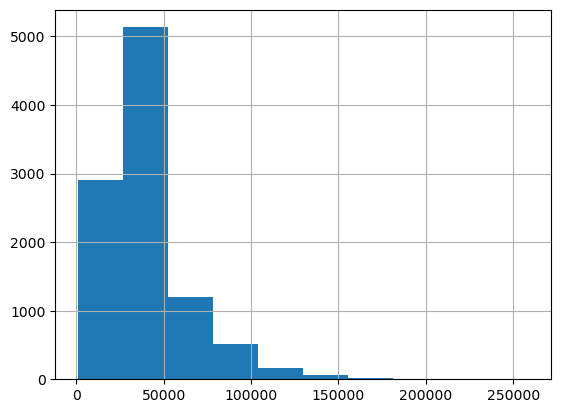

In [43]:
churn_df['Income']=churn_df['Income'].fillna(churn_df['Income'].mean())
churn_df['Income'].hist()

## Compare Median to Mean

<Axes: >

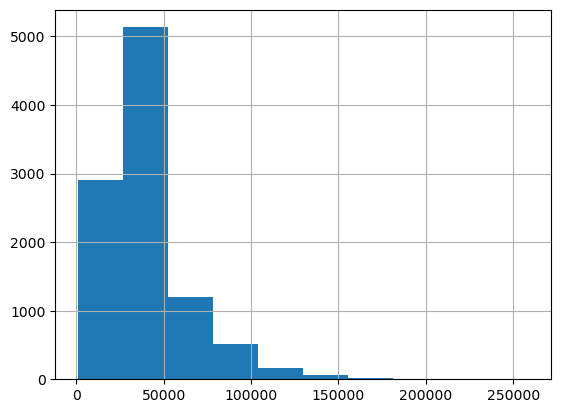

In [44]:
churn_df['Income']=churn_df['Income'].fillna(churn_df['Income'].median())
churn_df['Income'].hist()

## Impute Missing Values for Children

<Axes: >

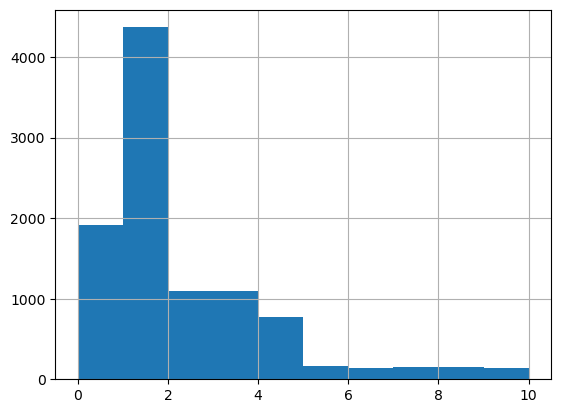

In [45]:
churn_df['Children']=churn_df['Children'].fillna(churn_df['Children'].median())
churn_df['Children'].hist()

##  Impute Missing Values for Age

<Axes: >

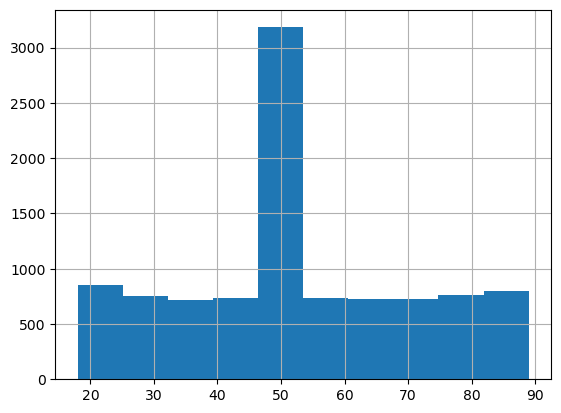

In [46]:
churn_df['Age']=churn_df['Age'].fillna(churn_df['Age'].median())
churn_df['Age'].hist()

## Impute Missing Vales for Tenure and Bandwidth_GB_Year and compare

<Axes: >

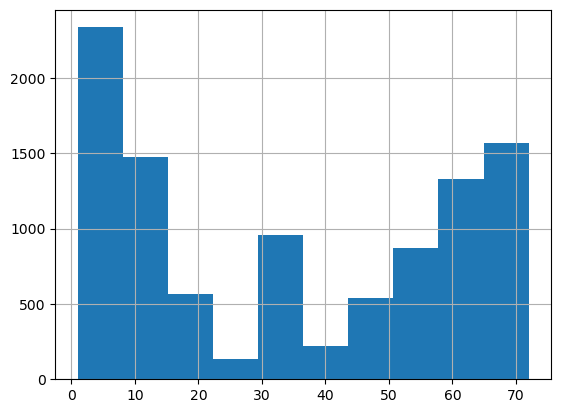

In [47]:
churn_df['Tenure']=churn_df['Tenure'].fillna(churn_df['Tenure'].median())
churn_df['Tenure'].hist()

<Axes: >

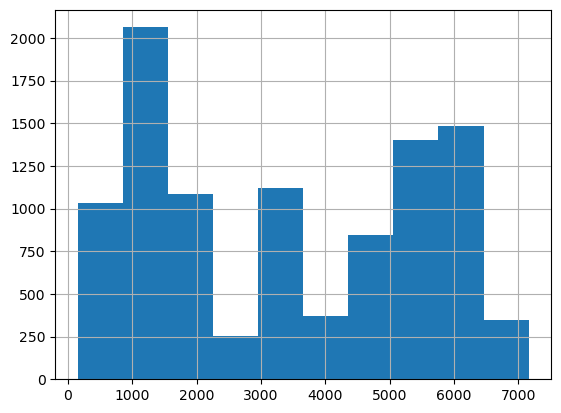

In [48]:
churn_df['Bandwidth_GB_Year']=churn_df['Bandwidth_GB_Year'].fillna(churn_df['Bandwidth_GB_Year'].median())
churn_df['Bandwidth_GB_Year'].hist()

# Verify no nulls for treated variables

In [49]:
churn_df.isna().sum()

CaseOrder                          0
Customer_id                        0
Interaction                        0
City                               0
State                              0
County                             0
Zip                                0
fixed_zip                          0
Lat                                0
Lng                                0
Population                         0
Area                               0
Timezone                           0
Job                                0
Children                           0
Age                                0
Education                          0
education_numeric                  0
Employment                         0
Income                             0
Marital                            0
Gender                             0
Churn                              0
Outage_sec_perweek                 0
Email                              0
Contacts                           0
Yearly_equip_failure               0
T

## No missing Values for quantitative variables.  

## Graph selected Variables

<Axes: >

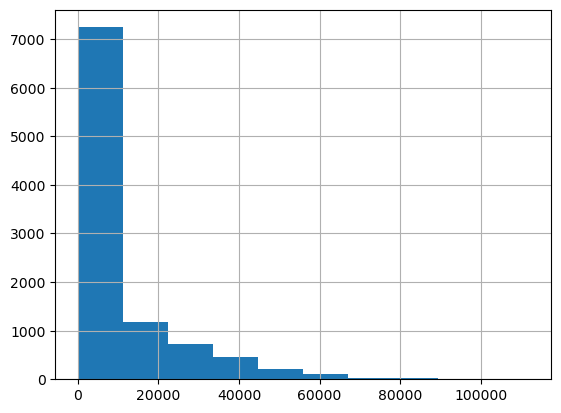

In [50]:
churn_df['Population'].hist()

<Axes: >

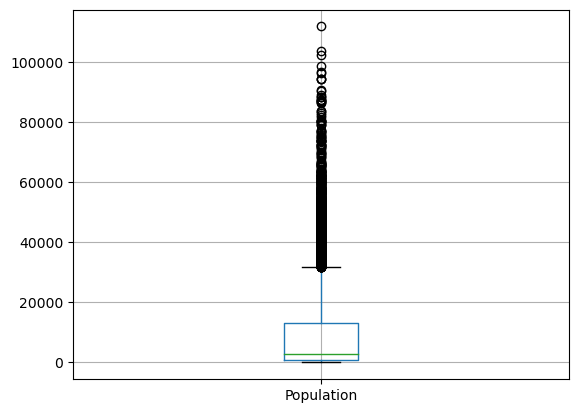

In [52]:
churn_df.boxplot(['Population'])

<Axes: >

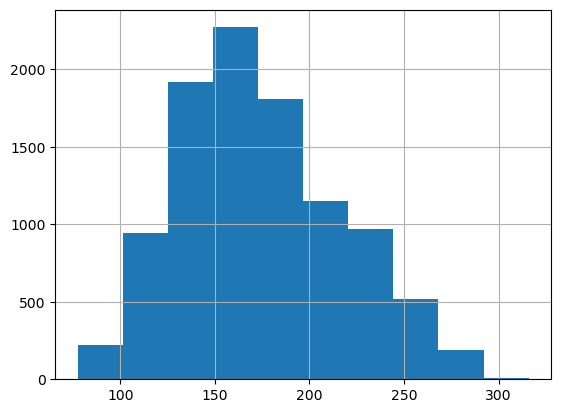

In [51]:
churn_df['MonthlyCharge'].hist()

<Axes: >

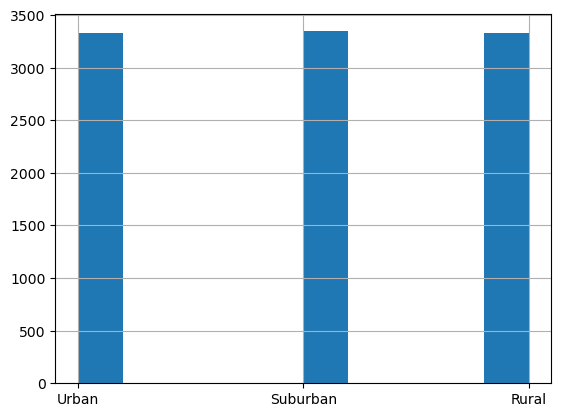

In [53]:
churn_df['Area'].hist()

<Axes: >

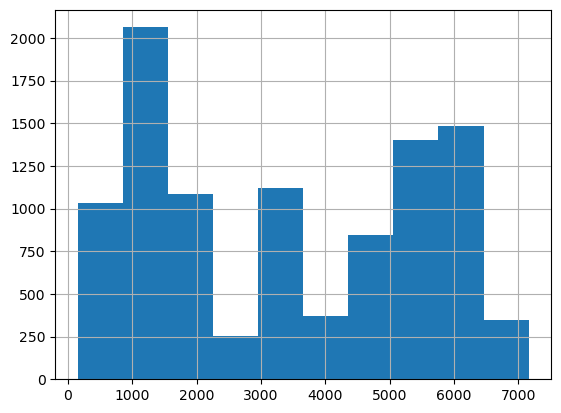

In [54]:
churn_df['Bandwidth_GB_Year'].hist()

<Axes: >

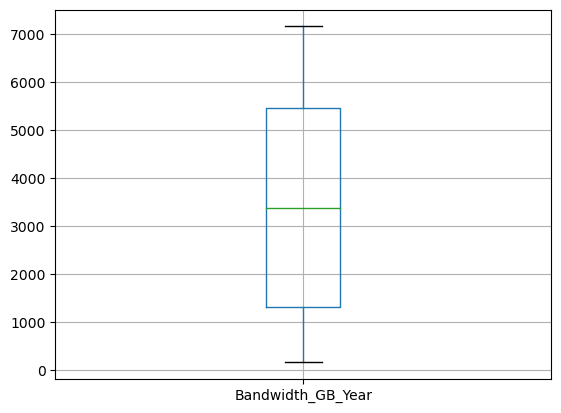

In [55]:
churn_df.boxplot(['Bandwidth_GB_Year'])

<Axes: xlabel='Bandwidth_GB_Year'>

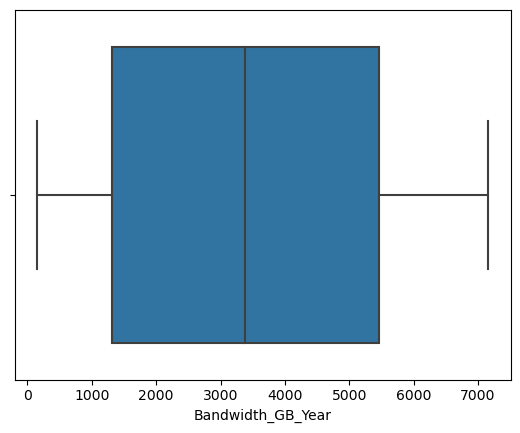

In [56]:
sns.boxplot(x=churn_df['Bandwidth_GB_Year'])

<Axes: >

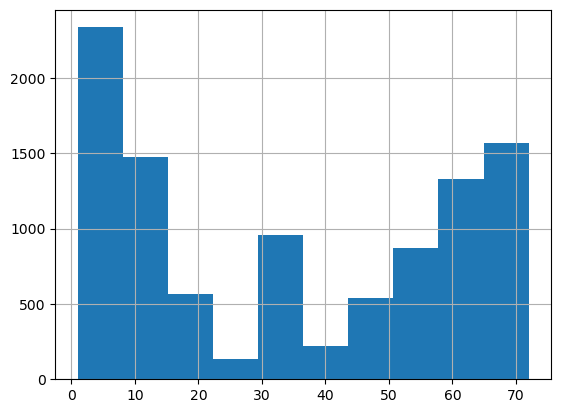

In [57]:
churn_df['Tenure'].hist()

<Axes: >

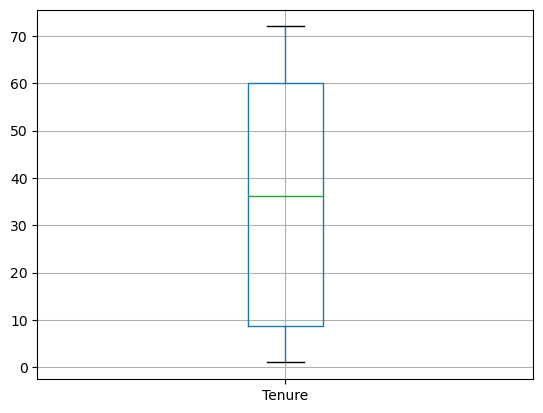

In [58]:
churn_df.boxplot(['Tenure'])

<Axes: >

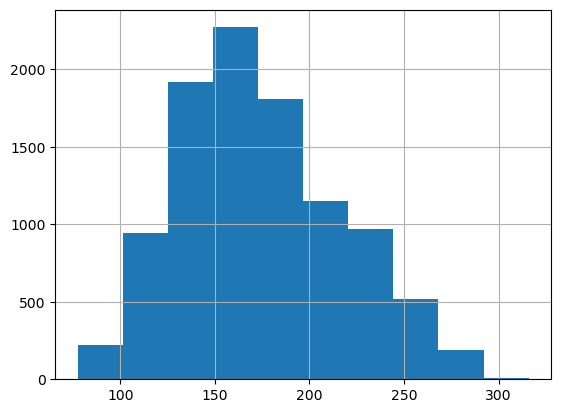

In [59]:
churn_df['MonthlyCharge'].hist()

### Hard to see in above visualization above but there are values around the 300 tick mark.  These outliers are more visible in the boxplots below.

<Axes: >

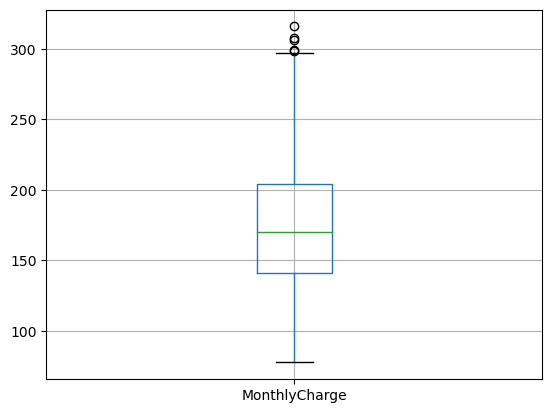

In [60]:
churn_df.boxplot(['MonthlyCharge'])

## Create Seaborn Boxplot for another view

<Axes: xlabel='MonthlyCharge'>

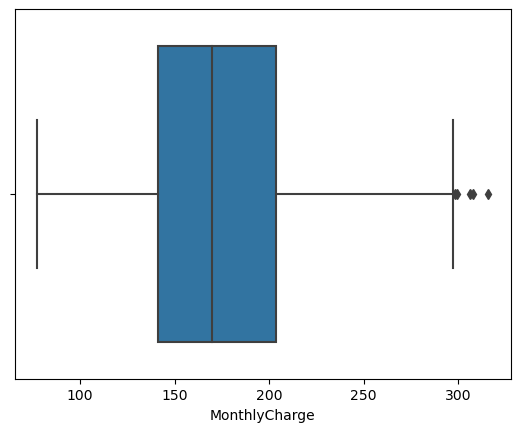

In [61]:
sns.boxplot(x=churn_df['MonthlyCharge'])

#  Apply Univariate Imputation using Mode to treat missing values for Boolean variables Phone, Techie, and TechSupport

## Graph Phone variable before imputation

<Axes: >

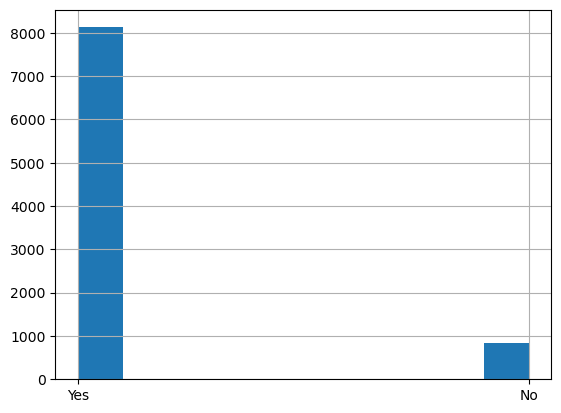

In [62]:
churn_df['Phone'].hist()

## Impute missing values and graph Phone variable after imputation

<Axes: >

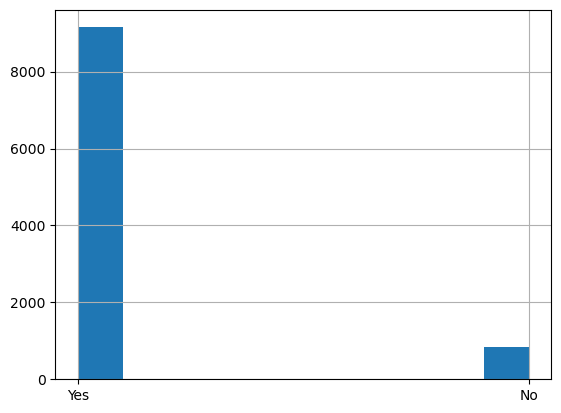

In [63]:
series = pd.Series(churn_df['Phone'])
churn_phone_mode = series.mode()[0]
churn_phone_filled = series.fillna(churn_phone_mode)
churn_df['Phone'] = churn_phone_filled
churn_df['Phone'].hist()

### Verify no missing values

In [64]:
churn_df['Phone'].isnull().sum()

0

## Graph Techie variable before imputation

<Axes: >

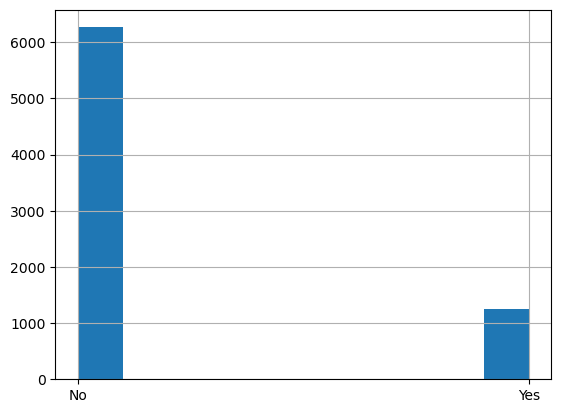

In [65]:
churn_df['Techie'].hist()

In [66]:
churn_df['Techie'].isnull().sum()

2477

### Perform imputation, graph, and verify no kissing values

0

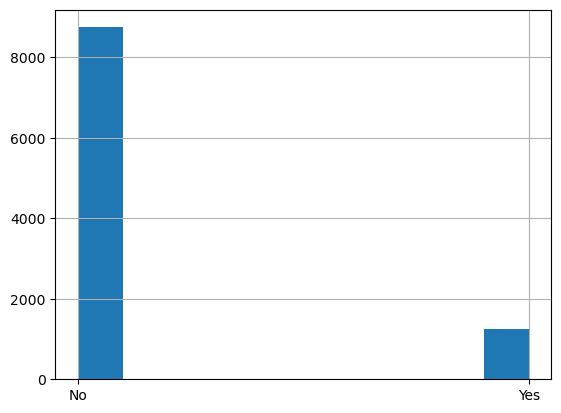

In [67]:
series = pd.Series(churn_df['Techie'])
churn_techie_mode = series.mode()[0]
churn_techie_filled = series.fillna(churn_techie_mode)
churn_df['Techie'] = churn_techie_filled
churn_df['Techie'].hist()
churn_df['Techie'].isnull().sum()

<Axes: >

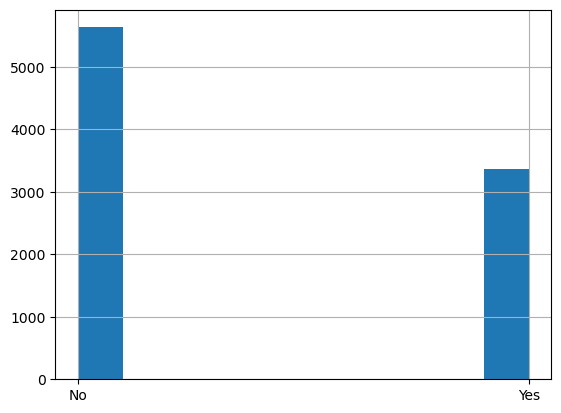

In [68]:
churn_df['TechSupport'].hist()

In [69]:
churn_df['TechSupport'].isnull().sum()

991

<Axes: >

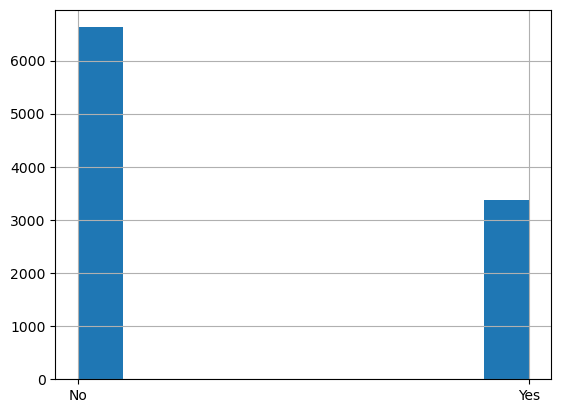

In [70]:
series = pd.Series(churn_df['TechSupport'])
churn_techsupport_mode = series.mode()[0]
churn_techsupport_filled = series.fillna(churn_techsupport_mode)
churn_df['TechSupport'] = churn_techsupport_filled
churn_df['TechSupport'].hist()

In [71]:
churn_df['TechSupport'].isnull().sum()

0

# Verify no missing data after Imputation

In [72]:
churn_df.isnull().sum()

CaseOrder                       0
Customer_id                     0
Interaction                     0
City                            0
State                           0
County                          0
Zip                             0
fixed_zip                       0
Lat                             0
Lng                             0
Population                      0
Area                            0
Timezone                        0
Job                             0
Children                        0
Age                             0
Education                       0
education_numeric               0
Employment                      0
Income                          0
Marital                         0
Gender                          0
Churn                           0
Outage_sec_perweek              0
Email                           0
Contacts                        0
Yearly_equip_failure            0
Techie                          0
Contract                        0
Port_modem    

## Verify no missing data after Imputation with missing data bar chart

<Axes: >

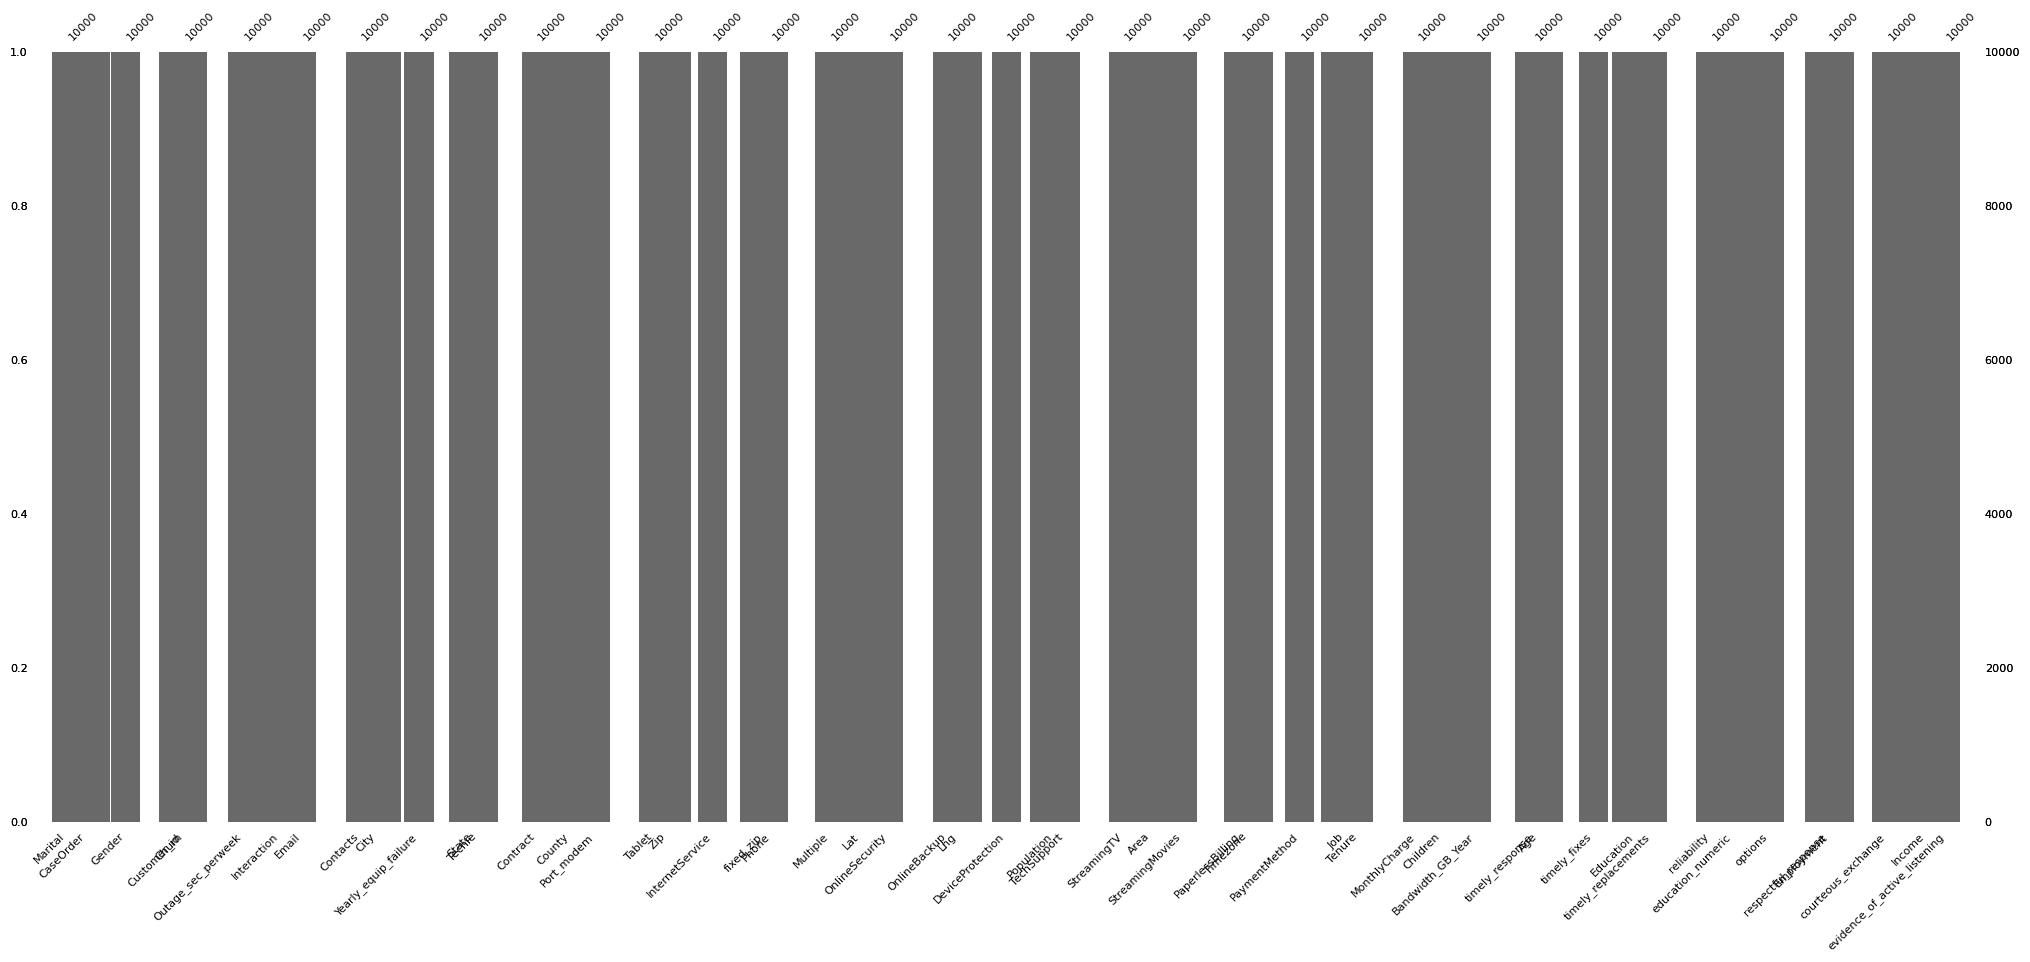

In [73]:
cols=churn_df.columns
msno.bar(churn_df[cols[:20]], fontsize=8)
msno.bar(churn_df[cols[20:]],fontsize=8)

## Verify no missing data after Imputation with missing data matrix

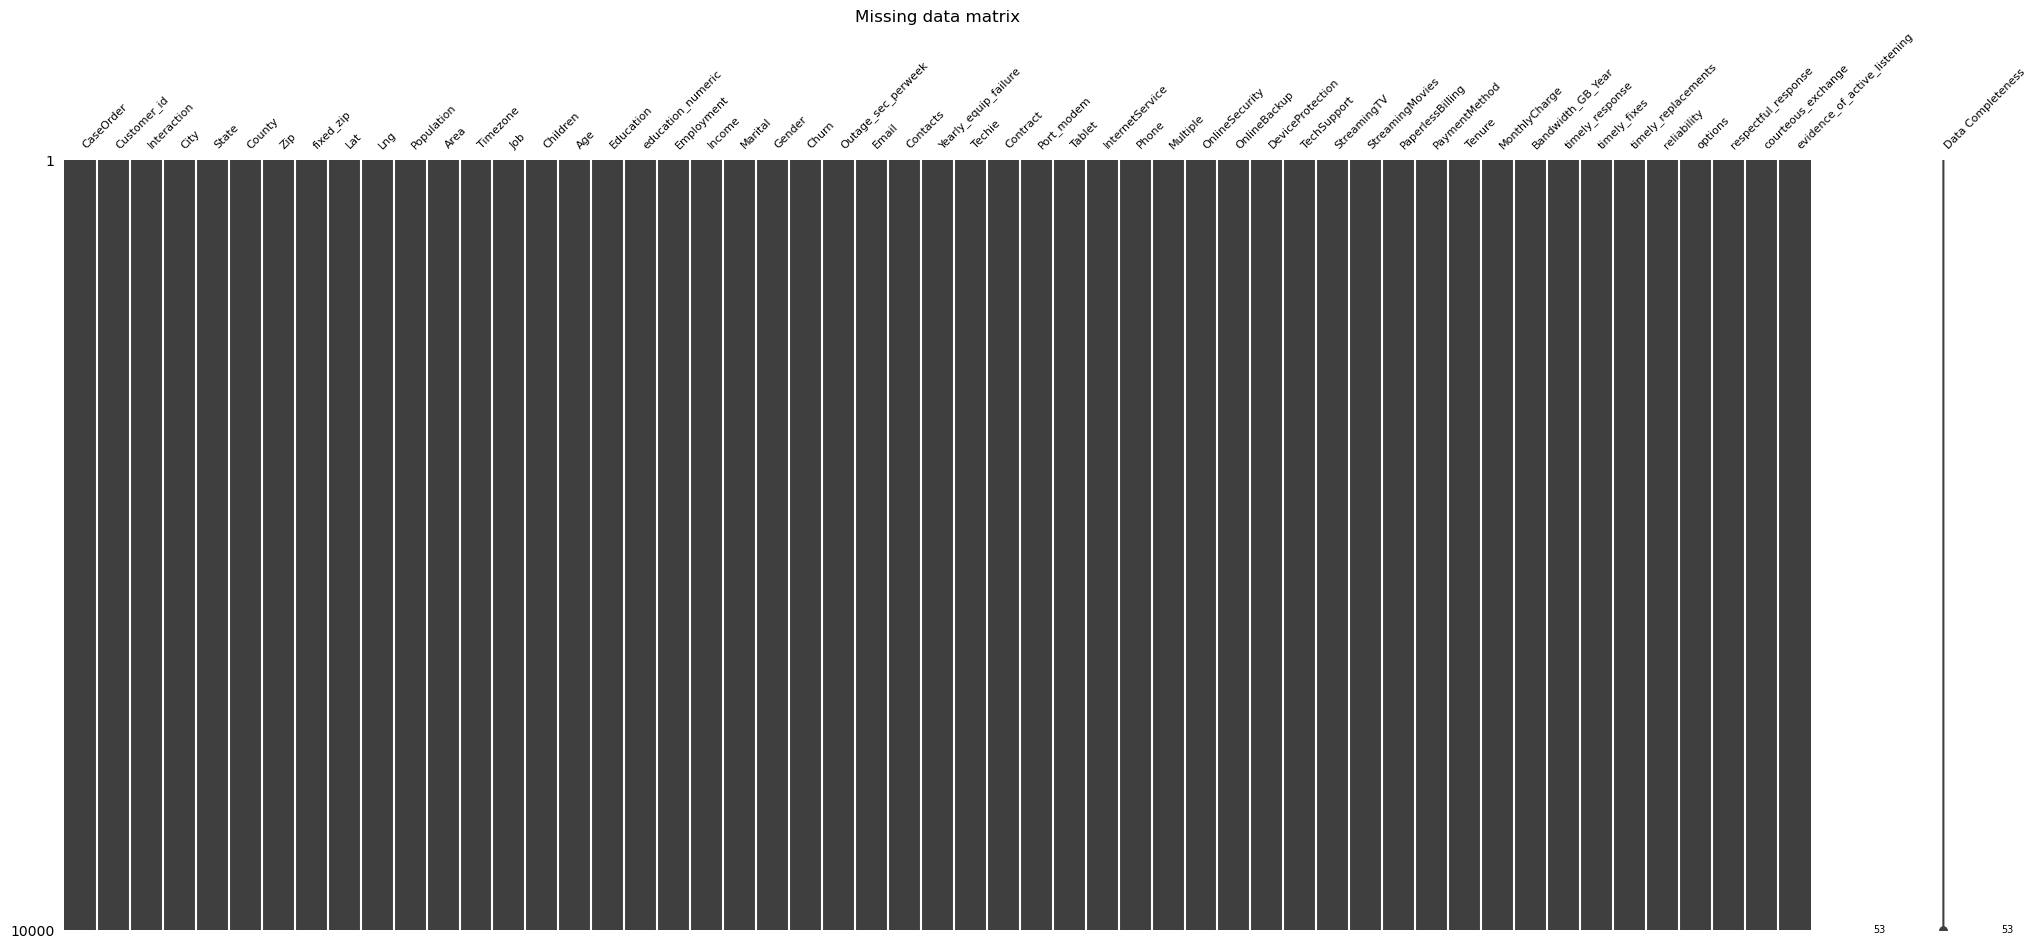

In [74]:
msno.matrix(churn_df, fontsize = 8, labels=True)
plt.title('Missing data matrix')
plt.show()

#  Identify Outliers

## Graph distribution of quantitative variables including Z scores 

In [75]:
from pandas import DataFrame
import scipy.stats as stats

## Customer Demographic Data

<Axes: >

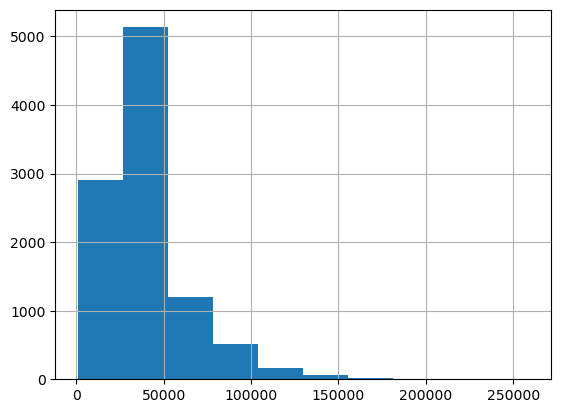

In [76]:
churn_df['Income'].hist()

In [77]:
# two ways to determin z-scores, one method from stack overflow
# other methos from webinar 2 slides
#avg=churn_df['Income'].mean()
#std=churn_df['Income'].std()
#churn_df['z_score_income']=((churn_df['Income'] - avg)/std)
churn_df['z_score_income']=stats.zscore(churn_df['Income'])
churn_df[['Income','z_score_income']].head()

,Income,z_score_income
0,28561.990000,-0.462880
1,21704.770000,-0.741925
2,39936.762226,0.000000
3,18925.230000,-0.855035
4,40074.190000,0.005592


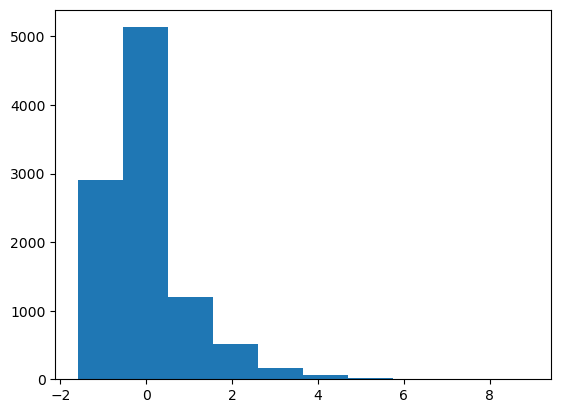

In [78]:
plt.hist(churn_df['z_score_income'])
plt.show()                  

In [79]:
# histogram of Income and its Z score almost identical.

<Axes: >

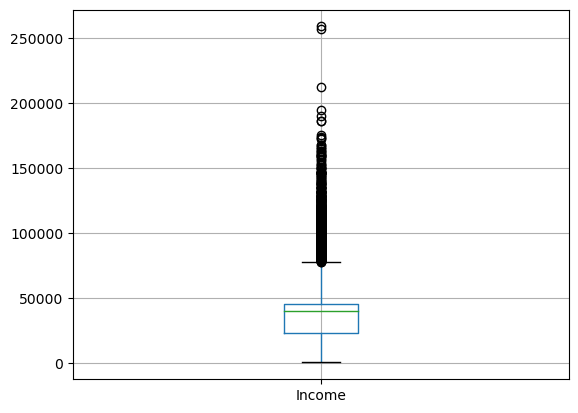

In [80]:
churn_df.boxplot(['Income'])

while median income was just under $50,000 there are many customers with incomes far above that.

<Axes: >

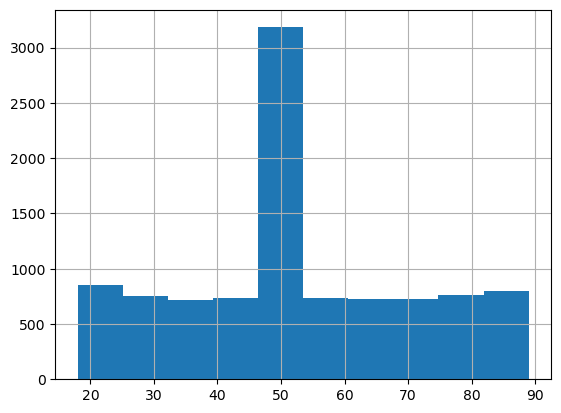

In [110]:
churn_df['Age'].hist()

In [111]:
churn_df['z_score_age']=stats.zscore(churn_df['Age'])
churn_df[['Age','z_score_age']].head()

,Age,z_score_age
0,68.0,0.821689
1,27.0,-1.455765
2,50.0,-0.178169
3,48.0,-0.289264
4,83.0,1.654904


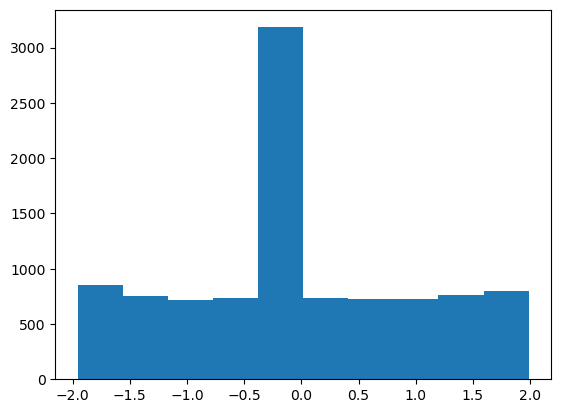

In [112]:
plt.hist(churn_df['z_score_age'])
plt.show()  

<Axes: >

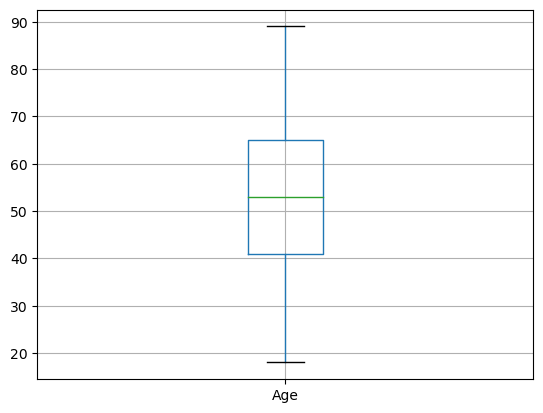

In [113]:
churn_df.boxplot(['Age'])

The population has a disproportionate number of customers in their late 40s and early 50s

<Axes: >

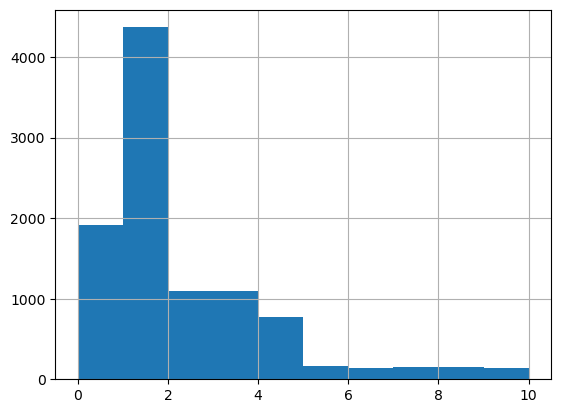

In [81]:
churn_df['Children'].hist()

In [82]:
churn_df['z_score_children']=stats.zscore(churn_df['Children'])
churn_df[['Children','z_score_children']].head()

,Children,z_score_children
0,1.0,-0.427079
1,1.0,-0.427079
2,4.0,1.130655
3,1.0,-0.427079
4,0.0,-0.946323


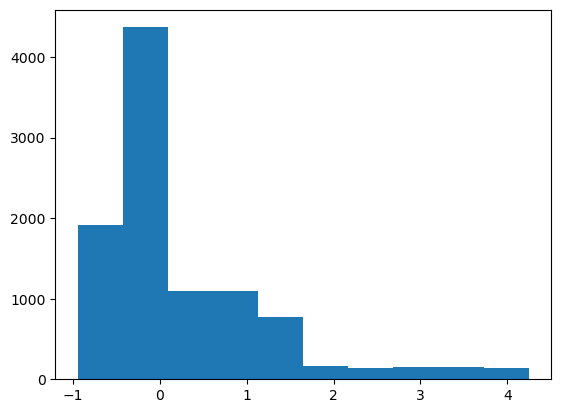

In [83]:
plt.hist(churn_df['z_score_children'])
plt.show()                  

<Axes: >

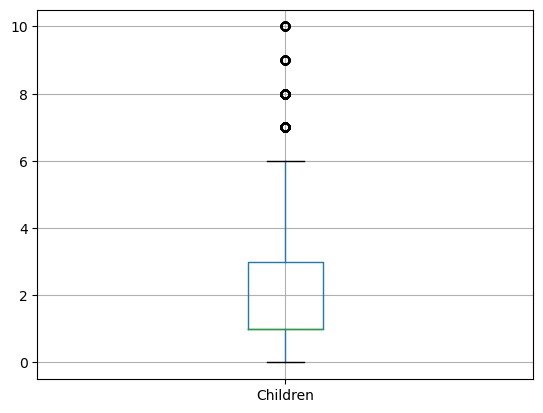

In [84]:
churn_df.boxplot(['Children'])

<Axes: >

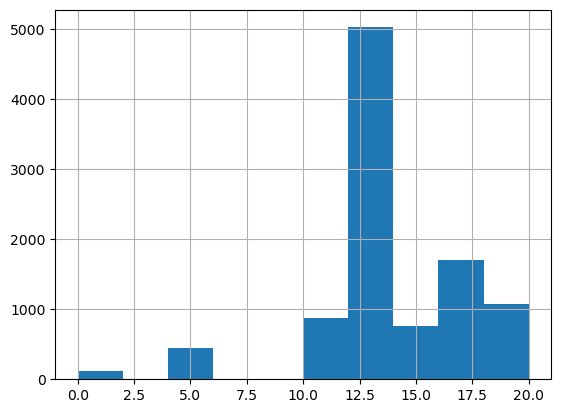

In [85]:
churn_df['education_numeric'].hist()

<Axes: >

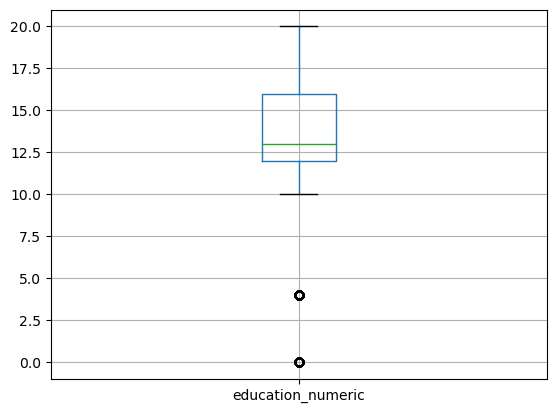

In [86]:
churn_df.boxplot(['education_numeric'])

In [87]:
churn_df['z_score_educationnumeric']=stats.zscore(churn_df['education_numeric'])
churn_df[['education_numeric','z_score_educationnumeric']].head()

,education_numeric,z_score_educationnumeric
0,18,1.489229
1,12,-0.292358
2,12,-0.292358
3,20,2.083091
4,18,1.489229


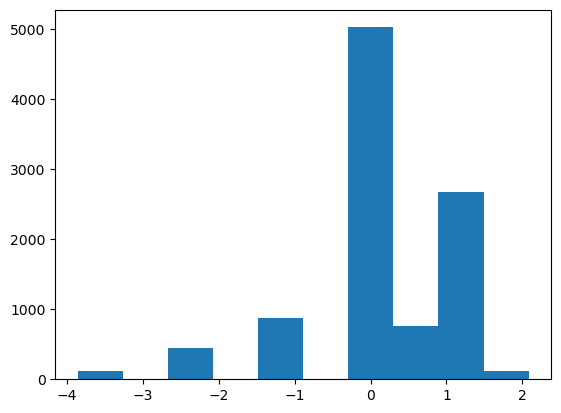

In [88]:
plt.hist(churn_df['z_score_educationnumeric'])
plt.show()           

## Service Related Data

<Axes: >

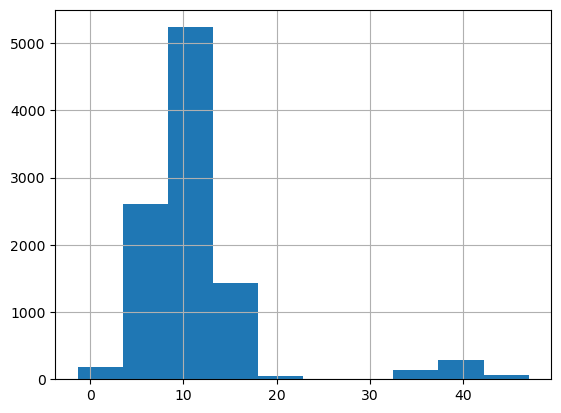

In [114]:
churn_df['Outage_sec_perweek'].hist()

In [115]:
churn_df['z_score_outage']=stats.zscore(churn_df['Outage_sec_perweek'])
churn_df[['Outage_sec_perweek','z_score_outage']].head()

,Outage_sec_perweek,z_score_outage
0,6.972566,-0.637726
1,12.014541,0.079935
2,10.245616,-0.171849
3,15.206193,0.534225
4,8.960316,-0.354795


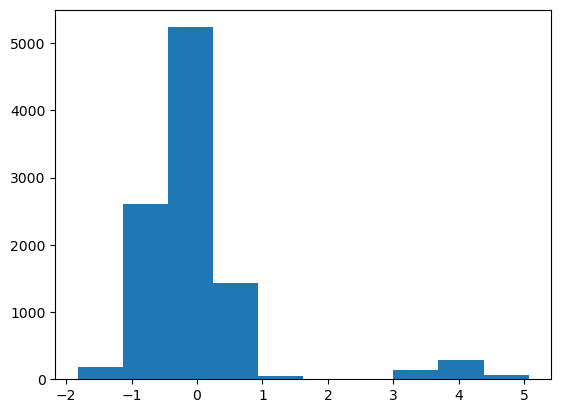

In [117]:
plt.hist(churn_df['z_score_outage'])
plt.show()        

<Axes: >

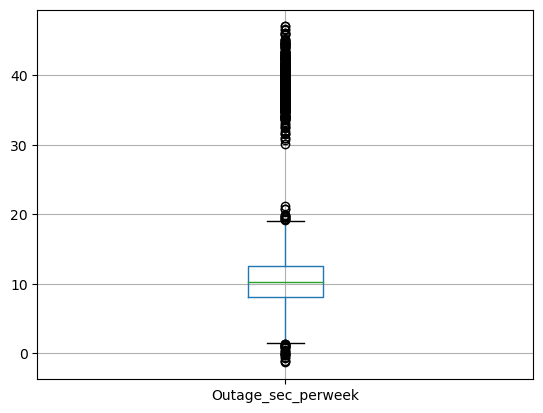

In [122]:
churn_df.boxplot(['Outage_sec_perweek'])

<Axes: >

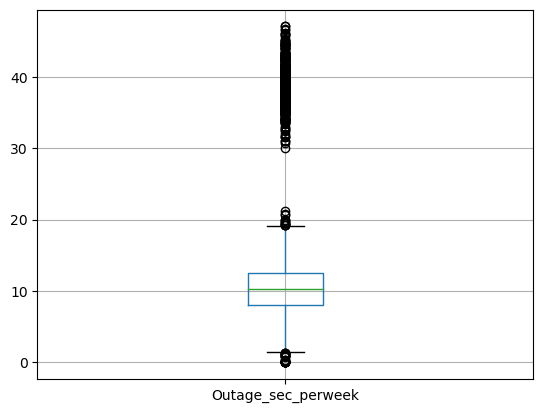

In [125]:
constant_value = 0
churn_df['Outage_sec_perweek']=churn_df['Outage_sec_perweek'].clip(lower=constant_value)
churn_df.boxplot(['Outage_sec_perweek'])

<Axes: >

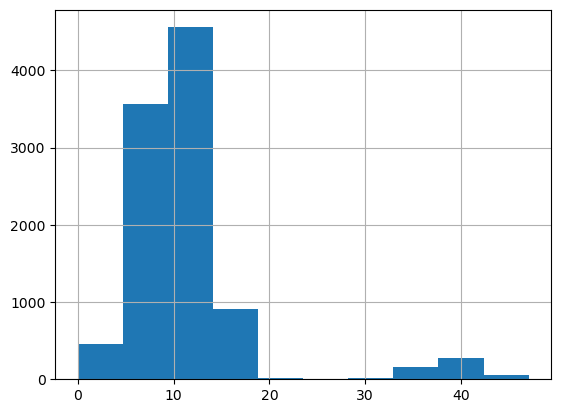

In [126]:
churn_df['Outage_sec_perweek'].hist()

Outage_sec_perweek had values that were below zero, or negative outages.  Replaced values <0 with 0.  

<Axes: >

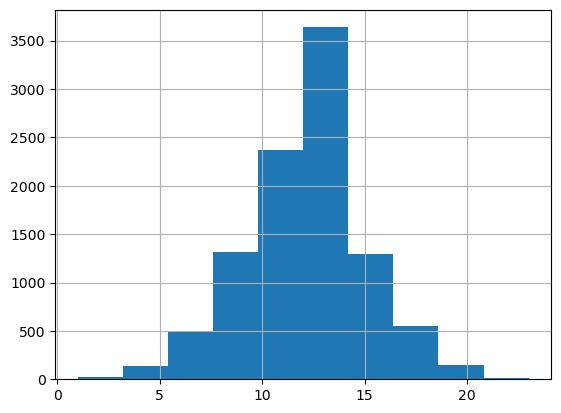

In [119]:
churn_df['Email'].hist()

In [120]:
churn_df['z_score_email']=stats.zscore(churn_df['Email'])
churn_df[['Email','z_score_email']].head()

,Email,z_score_email
0,10,-0.666282
1,12,-0.005288
2,9,-0.996779
3,15,0.986203
4,16,1.316700


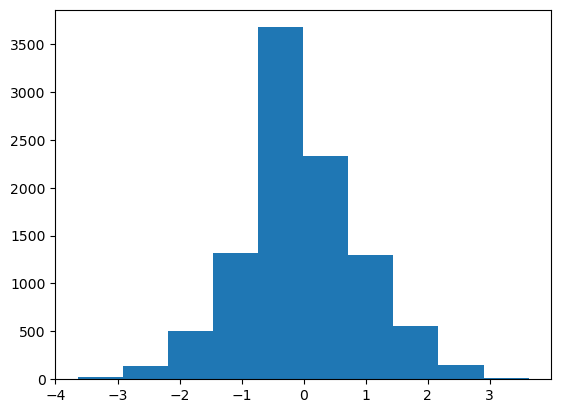

In [121]:
plt.hist(churn_df['z_score_email'])
plt.show()        

<Axes: >

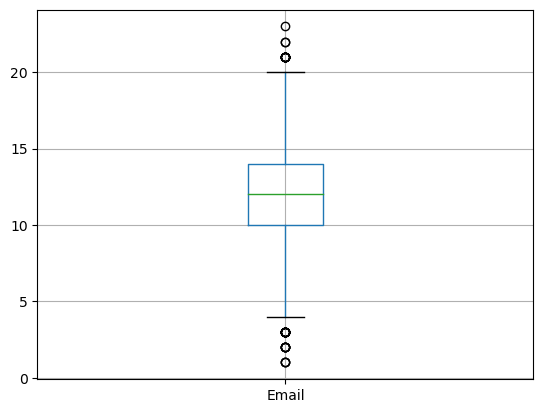

In [128]:
churn_df.boxplot(['Email'])

While customes received a median number of 12 emails in the last year, some customers recieved much higher and much lower numbers of emails.

<Axes: >

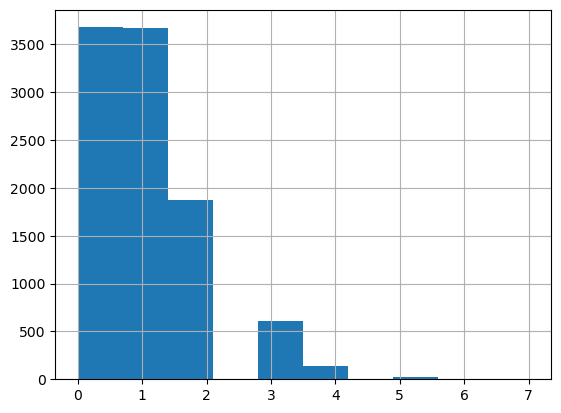

In [129]:
churn_df['Contacts'].hist()

In [130]:
churn_df['z_score_contacts']=stats.zscore(churn_df['Contacts'])
churn_df[['Contacts','z_score_email']].head()

,Contacts,z_score_email
0,0,-0.666282
1,0,-0.005288
2,0,-0.996779
3,2,0.986203
4,2,1.316700


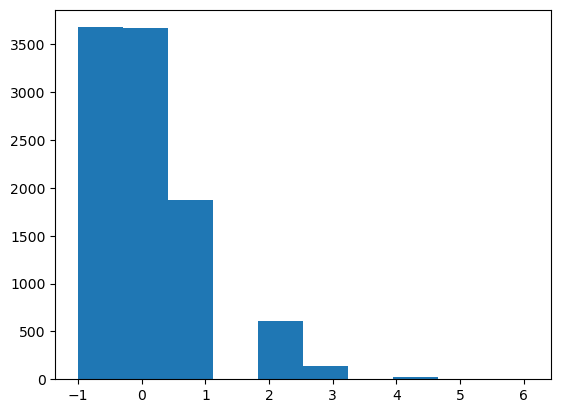

In [131]:
plt.hist(churn_df['z_score_contacts'])
plt.show()        

<Axes: >

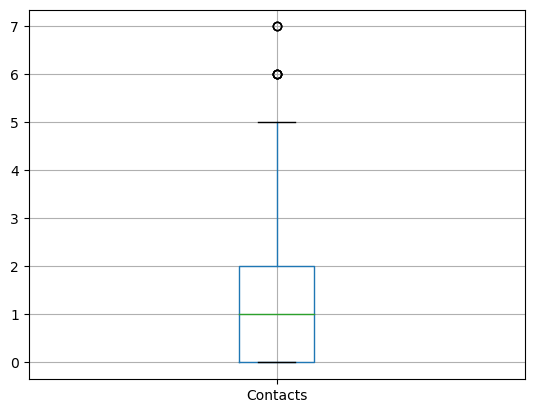

In [132]:
churn_df.boxplot(['Contacts'])

Most customers contacted technical support between o and 2 times.  However, there were customers that had to contact Tech Support several times.  

<Axes: >

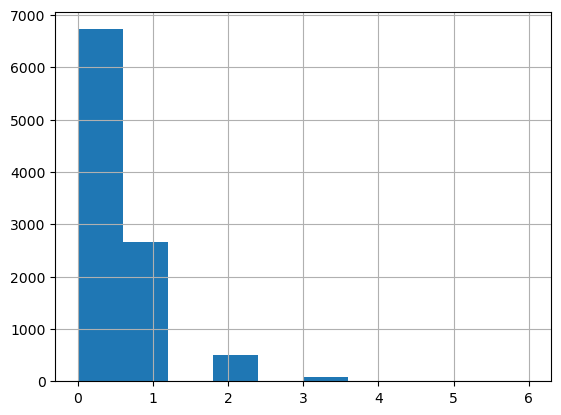

In [133]:
churn_df['Yearly_equip_failure'].hist()

In [134]:
churn_df['z_score_equipfailure']=stats.zscore(churn_df['Yearly_equip_failure'])
churn_df[['Yearly_equip_failure','z_score_equipfailure']].head()

,Yearly_equip_failure,z_score_equipfailure
0,1,0.946658
1,1,0.946658
2,1,0.946658
3,0,-0.625864
4,1,0.946658


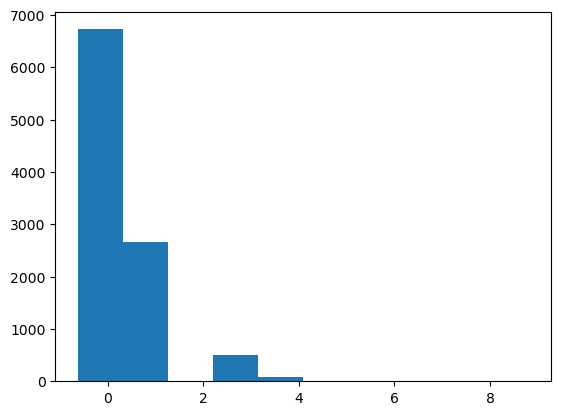

In [135]:
plt.hist(churn_df['z_score_equipfailure'])
plt.show()    

<Axes: >

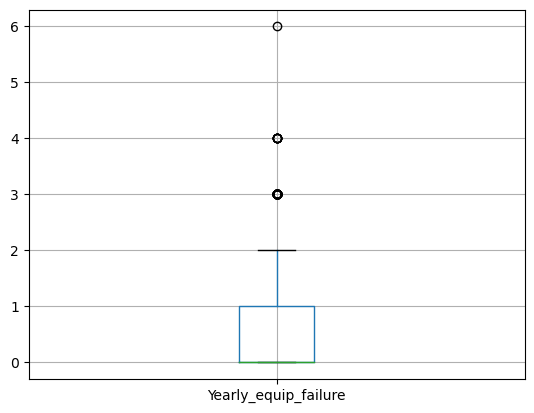

In [136]:
churn_df.boxplot(['Yearly_equip_failure'])

Patterns for Contacts and Yearly_equip_failure are similar.

<Axes: >

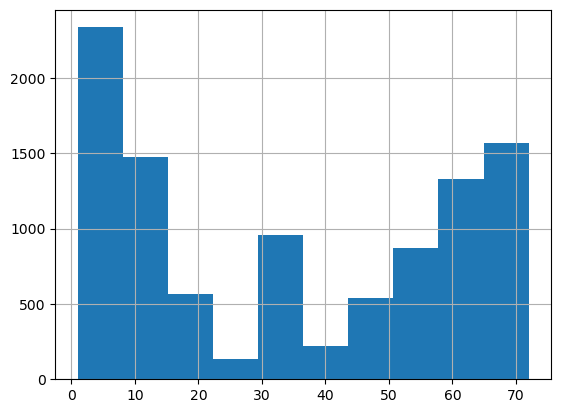

In [137]:
churn_df['Tenure'].hist()

In [138]:
churn_df['z_score_tenure']=stats.zscore(churn_df['Tenure'])
churn_df[['Tenure','z_score_tenure']].head()

,Tenure,z_score_tenure
0,6.795513,-1.106419
1,1.156681,-1.330346
2,15.754144,-0.750657
3,17.087227,-0.697719
4,1.670972,-1.309923


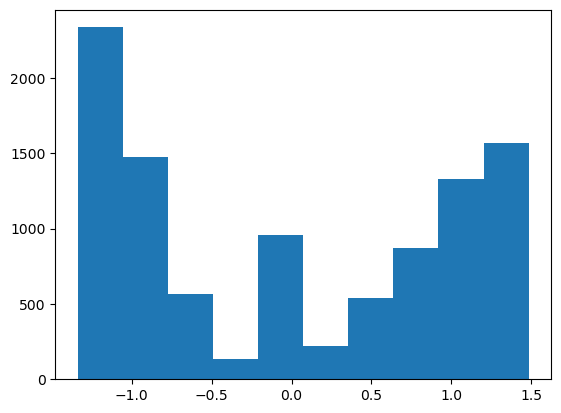

In [139]:
plt.hist(churn_df['z_score_tenure'])
plt.show()    

<Axes: >

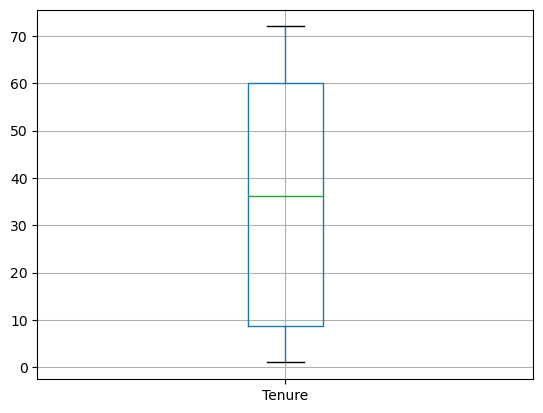

In [140]:
churn_df.boxplot(['Tenure'])

<Axes: >

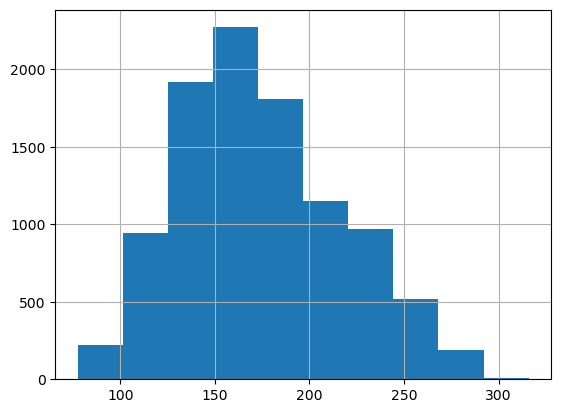

In [141]:
churn_df['MonthlyCharge'].hist()

In [142]:
churn_df['z_score_monthlycharge']=stats.zscore(churn_df['MonthlyCharge'])
churn_df[['MonthlyCharge','z_score_monthlycharge']].head()

,MonthlyCharge,z_score_monthlycharge
0,171.449762,-0.060613
1,242.948015,1.589348
2,159.440398,-0.337752
3,120.249493,-1.242158
4,150.761216,-0.538041


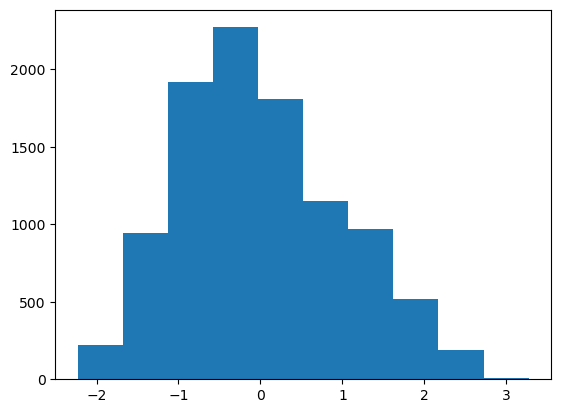

In [143]:
plt.hist(churn_df['z_score_monthlycharge'])
plt.show()

<Axes: >

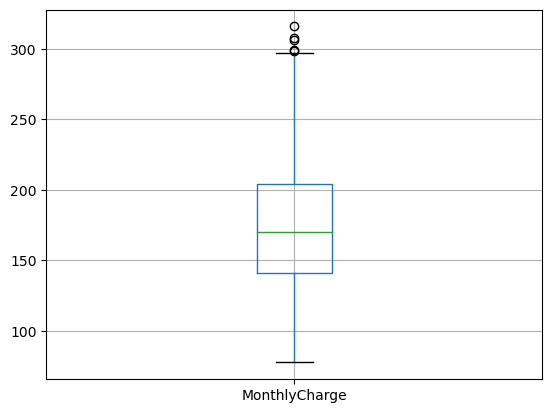

In [144]:
churn_df.boxplot(['MonthlyCharge'])

<Axes: >

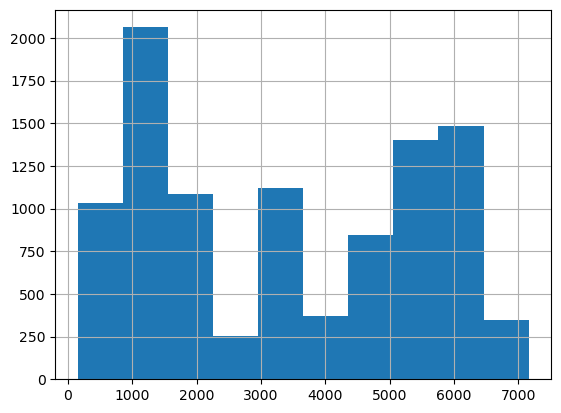

In [145]:
churn_df['Bandwidth_GB_Year'].hist()

In [146]:
churn_df['z_score_bandwidth_usage']=stats.zscore(churn_df['Bandwidth_GB_Year'])
churn_df[['Bandwidth_GB_Year','z_score_bandwidth_usage']].head()

,Bandwidth_GB_Year,z_score_bandwidth_usage
0,904.536110,-1.202650
1,800.982766,-1.252613
2,2054.706961,-0.647713
3,2164.579412,-0.594701
4,271.493436,-1.508082


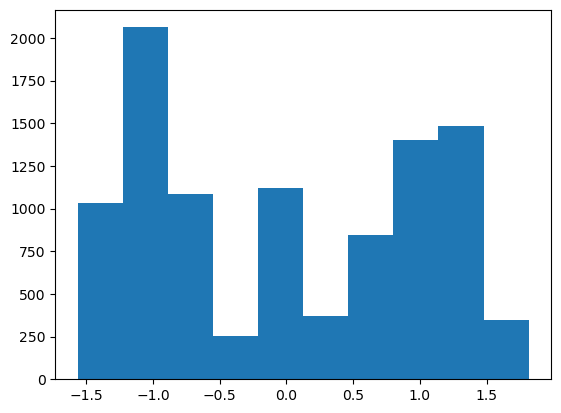

In [147]:
plt.hist(churn_df['z_score_bandwidth_usage'])
plt.show()

<Axes: >

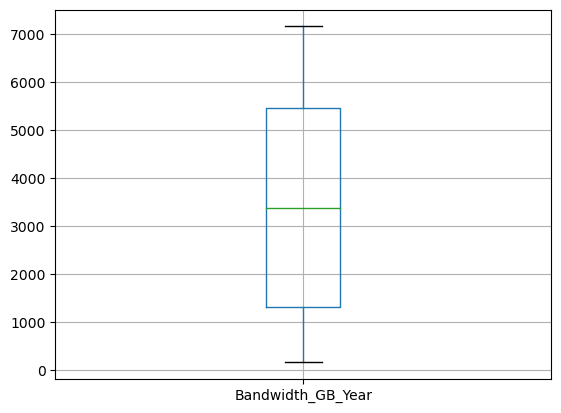

In [148]:
churn_df.boxplot(['Bandwidth_GB_Year'])

Bandwidth usage and the number of months the customer has stayed with the company (Tenure) have very similar patterns. 

## Extracting Cleaned DataFrame

In [149]:
churn_df.to_csv(r'D:\WGU\D206 Data Cleaning\churn_cleaned_mh.csv')

# PCA

##  Normalize the Data

In [150]:
test_pca =churn_df[['Contacts','Tenure', 'MonthlyCharge', 'timely_response', 'timely_fixes', 'timely_replacements','reliability','options', 'respectful_response','courteous_exchange', 'evidence_of_active_listening']]
test_pca_normalized=(test_pca-test_pca.mean())/test_pca.std()

In [151]:
pca=PCA(n_components=test_pca.shape[1])

In [152]:
pca.fit(test_pca_normalized)

PCA(n_components=11)

In [153]:
test_pca=pd.DataFrame(pca.transform(test_pca_normalized),
columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6','PC7','PC8','PC9','PC10','PC11'])                      

In [154]:
pca.fit(test_pca_normalized)

PCA(n_components=11)

In [155]:
test_pca2=pd.DataFrame(pca.transform(test_pca_normalized),columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6','PC7','PC8','PC9','PC10','PC11'])

In [156]:
loadings =pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6','PC7','PC8','PC9','PC10','PC11'], index=test_pca_normalized.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Contacts,-0.008630,-0.009272,0.276310,0.832002,0.477311,0.033664,-0.034235,-0.002957,-0.026880,0.020063,-1.266459e-07
Tenure,-0.004821,0.032320,-0.564266,0.541381,-0.620226,0.044716,-0.000900,0.015565,-0.016043,-0.007009,1.459417e-02
MonthlyCharge,0.000650,-0.008141,0.775846,0.099594,-0.621640,-0.019273,0.016426,-0.017394,-0.004336,0.022575,-1.300542e-02
timely_response,0.459006,0.282345,0.025616,0.001532,0.003843,-0.070713,-0.119775,-0.046370,0.024127,-0.240032,7.932387e-01
timely_fixes,0.434279,0.285281,0.008835,0.017678,0.001189,-0.105997,-0.170799,-0.065849,0.071240,-0.592246,-5.736294e-01
timely_replacements,0.400782,0.283135,-0.022734,-0.017584,-0.000630,-0.175512,-0.252652,-0.146529,-0.393512,0.675074,-1.780361e-01
reliability,0.145685,-0.569281,-0.030634,0.016053,-0.023366,-0.170980,-0.483149,-0.443677,0.430929,0.086056,1.820301e-02
options,-0.175432,0.591076,0.008712,0.006768,0.012768,0.137287,0.058558,-0.209819,0.694643,0.262617,-4.207595e-02
respectful_response,0.405167,-0.183800,0.003393,0.016971,-0.001037,-0.061414,0.063520,0.757950,0.404136,0.228122,-6.400374e-02
courteous_exchange,0.358352,-0.180755,-0.025087,0.039452,0.017972,-0.179017,0.806318,-0.378609,0.069508,0.066058,-4.084026e-02


In [157]:
cov_matrix=np.dot(test_pca_normalized.T, test_pca_normalized)/test_pca.shape[0]
eigenvalues=[np.dot(eigenvector.T,np.dot(cov_matrix,eigenvector))for eigenvector in pca.components_]

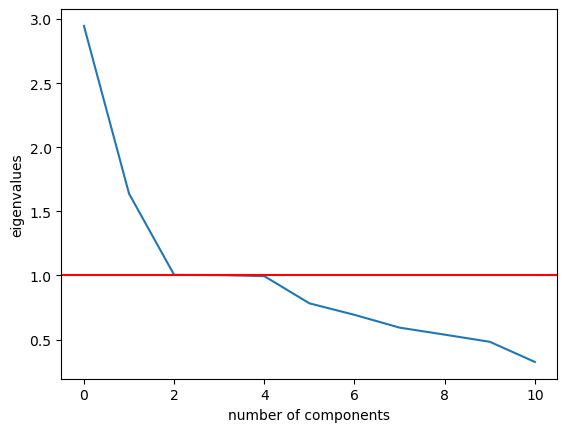

In [158]:
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalues')
plt.axhline(y=1, color="red")
plt.show()

In [ ]:
Appears that there is little benefit to using more than the first two components 